In [2]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import numpy as np

class Draw:
    connect = True
    
    def __init__(self, point=(0.5, 0.5)):
        self.point = point
    
    def getWidth(self):
        return 1
    
    def getHeight(self):
        return 1
    
    def getUpPoint(self):
        return (self.point[0], self.point[1] + self.getHeight() / 2)
    
    def getDownPoint(self):
        return (self.point[0], self.point[1] - self.getHeight() / 2)
    
    def getRightPoint(self):
        return (self.point[0] + self.getWidth() / 2, self.point[1])
    
    def getLeftPoint(self):
        return (self.point[0] - self.getWidth() / 2, self.point[1])
    
    def center(self, plus_x=0, plus_y=0):
        self.point = (self.getWidth() / 2 + plus_x, self.getHeight() / 2 + plus_y)
    
    def render(self, ax):
        pass
    
    def show(self, scale=5, axis='off', plus_x=0, plus_y=0):
        fig, ax = plt.subplots(figsize=(self.getWidth() * scale, self.getHeight() * scale))
        ax.set_xlim([0, self.getRightPoint()[0] + plus_x])
        ax.set_ylim([0, self.getUpPoint()[1] + plus_y])
        self.render(ax=ax)
        plt.axis(axis)
        return plt.show()

class Node(Draw):
    def __init__(self, point=(0.5, 0.5), radius=0.5, color='black', fill=False, linewidth=1):
        self.radius = radius
        self.color = color
        self.point = point
        self.fill = fill
        self.linewidth = linewidth
        
    def getRightPoint(self):
        return (self.point[0] + self.radius, self.point[1])
    
    def getLeftPoint(self):
        return (self.point[0] - self.radius, self.point[1])
    
    def getWidth(self):
        return self.radius * 2
    
    def getHeight(self):
        return self.radius * 2
    
    def render(self, ax):
        circle = plt.Circle(self.point, self.radius, color=self.color, fill=self.fill, linewidth=self.linewidth)
        ax.add_patch(circle)

class Dots(Node):
    connect = False
    
    def __init__(self, point=(0.5, 0.5), n=3, radius=0.5, color='black', fill=True, scale=0.8):
        self.radius = radius
        self.color = color
        self.point = point
        self.fill = fill
        self.n = n
        self.scale = scale
    
    def render(self, ax):
        diameter = self.radius * 2
        dot_radius = diameter / self.n / 2
        for c in range(self.n):
            point = (self.point[0], (self.getUpPoint()[1] - dot_radius) - (c * dot_radius * 2))
            circle = plt.Circle(point, dot_radius * self.scale, color=self.color, fill=self.fill)
            ax.add_patch(circle)
        
class Layer(Draw):
    def __init__(self, point=(0.5, 0.5), space=0.05, title='layer'):
        self.space = space
        self.point = point
        self.components = []
        self.title = title
        
    def getHeight(self):
        return np.array([component.getHeight() for component in self.components]).sum() + self.space * (len(self.components) - 1)
    
    def getWidth(self):
        return np.array([component.getWidth() for component in self.components]).max()
        
    def render(self, ax):
        plt.text(self.getUpPoint()[0], self.getUpPoint()[1] + 0.075, self.title, ha='center', family='sans-serif', size=15)
        y_start_point = self.getUpPoint()[1]
        for component in self.components:
            component.point = (self.point[0], y_start_point - component.getHeight() / 2)
            y_start_point -= (component.getHeight() + self.space)
            component.render(ax)
            
class NNModel(Draw):
    def __init__(self, point=(0.5, 0.5), layer_space=0.2, line_width=1.5):
        self.point = point
        self.layer_space = layer_space
        self.layers = []
        self.lwidth = line_width
        
    def getHeight(self):
        return np.array([layer.getHeight() for layer in self.layers]).max() 
    
    def getWidth(self):
        return np.array([layer.getWidth() for layer in self.layers]).sum() + self.layer_space * (len(self.layers) - 1)
    
    def render(self, ax):
        x_start_point = self.point[0] - self.getWidth() / 2
        for layer in self.layers:
            layer.point = (x_start_point + layer.getWidth() / 2, self.point[1])
            layer.render(ax=ax)
            x_start_point += layer.getWidth() + self.layer_space
        for i in range(len(self.layers) - 1):
            for j in range(len(self.layers[i].components)):
                if self.layers[i].components[j].connect:
                    for k in range(len(self.layers[i + 1].components)):
                        if self.layers[i + 1].components[k].connect:
                            a = self.layers[i].components[j].getRightPoint()
                            b = self.layers[i + 1].components[k].getLeftPoint()
                            x = [a[0], b[0]]
                            y = [a[1], b[1]]
                            l1 = lines.Line2D(x, y, color='black', linewidth=self.lwidth)
                            ax.add_line(l1)

def visualize_layer(title=[], model=[]):
    layers = []
    for i in range(len(model)):
        layer = Layer(title=title[i])
        for j in range(model[i]):
            if np.ceil(model[i] / 2) - 1 == j:
                layer.components.append(Dots(radius=0.3, n=5))
            else:
                layer.components.append(Node(radius=0.3, linewidth=1.5))
        layers.append(layer)
    nnm = NNModel(layer_space=1.5)
    nnm.layers = layers
    nnm.center(plus_x=0.1, plus_y=0.1)
    return nnm.show(scale=0.5, axis='off', plus_x=0.1, plus_y=0.1)

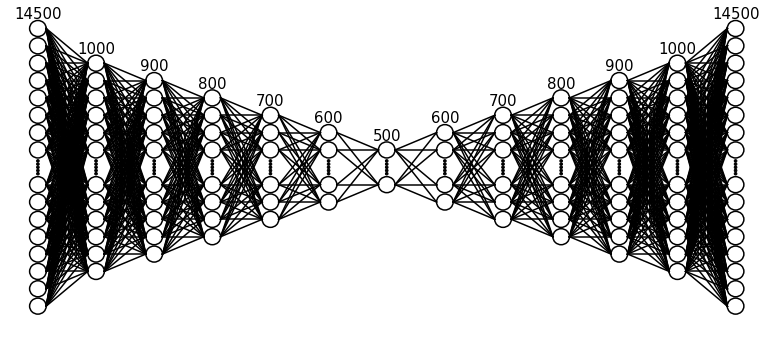

In [3]:
visualize_layer(title=[14500, 1000, 900, 800, 700, 600, 500, 600, 700, 800, 900, 1000, 14500],
                model=[17, 13, 11, 9, 7, 5, 3, 5, 7, 9, 11, 13, 17])

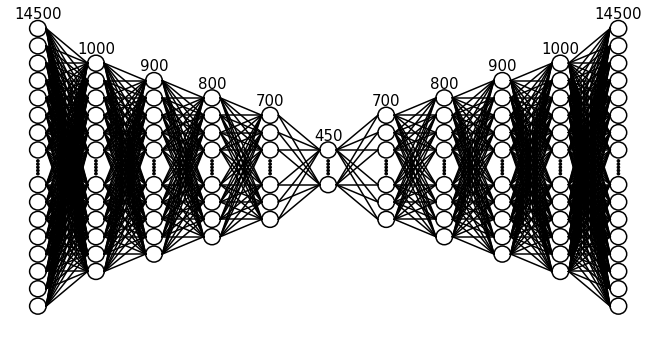

In [2]:
visualize_layer(title=[14500, 1000, 900, 800, 700, 450, 700, 800, 900, 1000, 14500],
                model=[17, 13, 11, 9, 7, 3, 7, 9, 11, 13, 17])

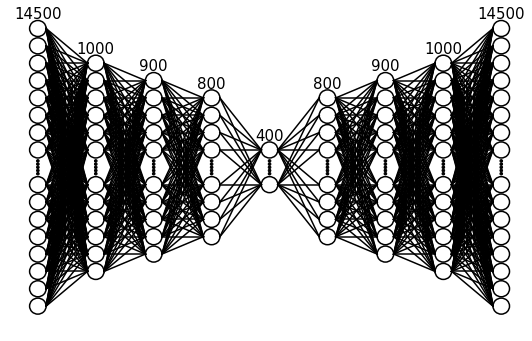

In [3]:
visualize_layer(title=[14500, 1000, 900, 800, 400, 800, 900, 1000, 14500],
                model=[17, 13, 11, 9, 3, 9, 11, 13, 17])

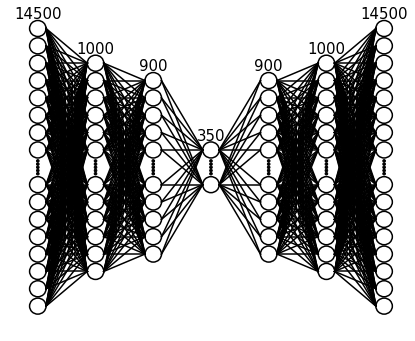

In [4]:
visualize_layer(title=[14500, 1000, 900, 350, 900, 1000, 14500],
                model=[17, 13, 11, 3, 11, 13, 17])

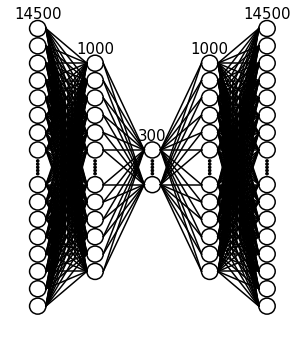

In [5]:
visualize_layer(title=[14500, 1000, 300, 1000, 14500],
                model=[17, 13, 3, 13, 17])

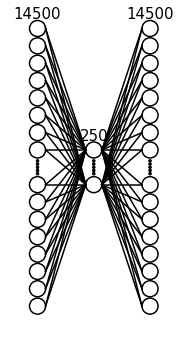

In [6]:
visualize_layer(title=[14500, 250, 14500],
                model=[17, 3, 17])